<a href="https://colab.research.google.com/github/neurontist/LangChain-for-LLM-Application-Development/blob/main/L2%20Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

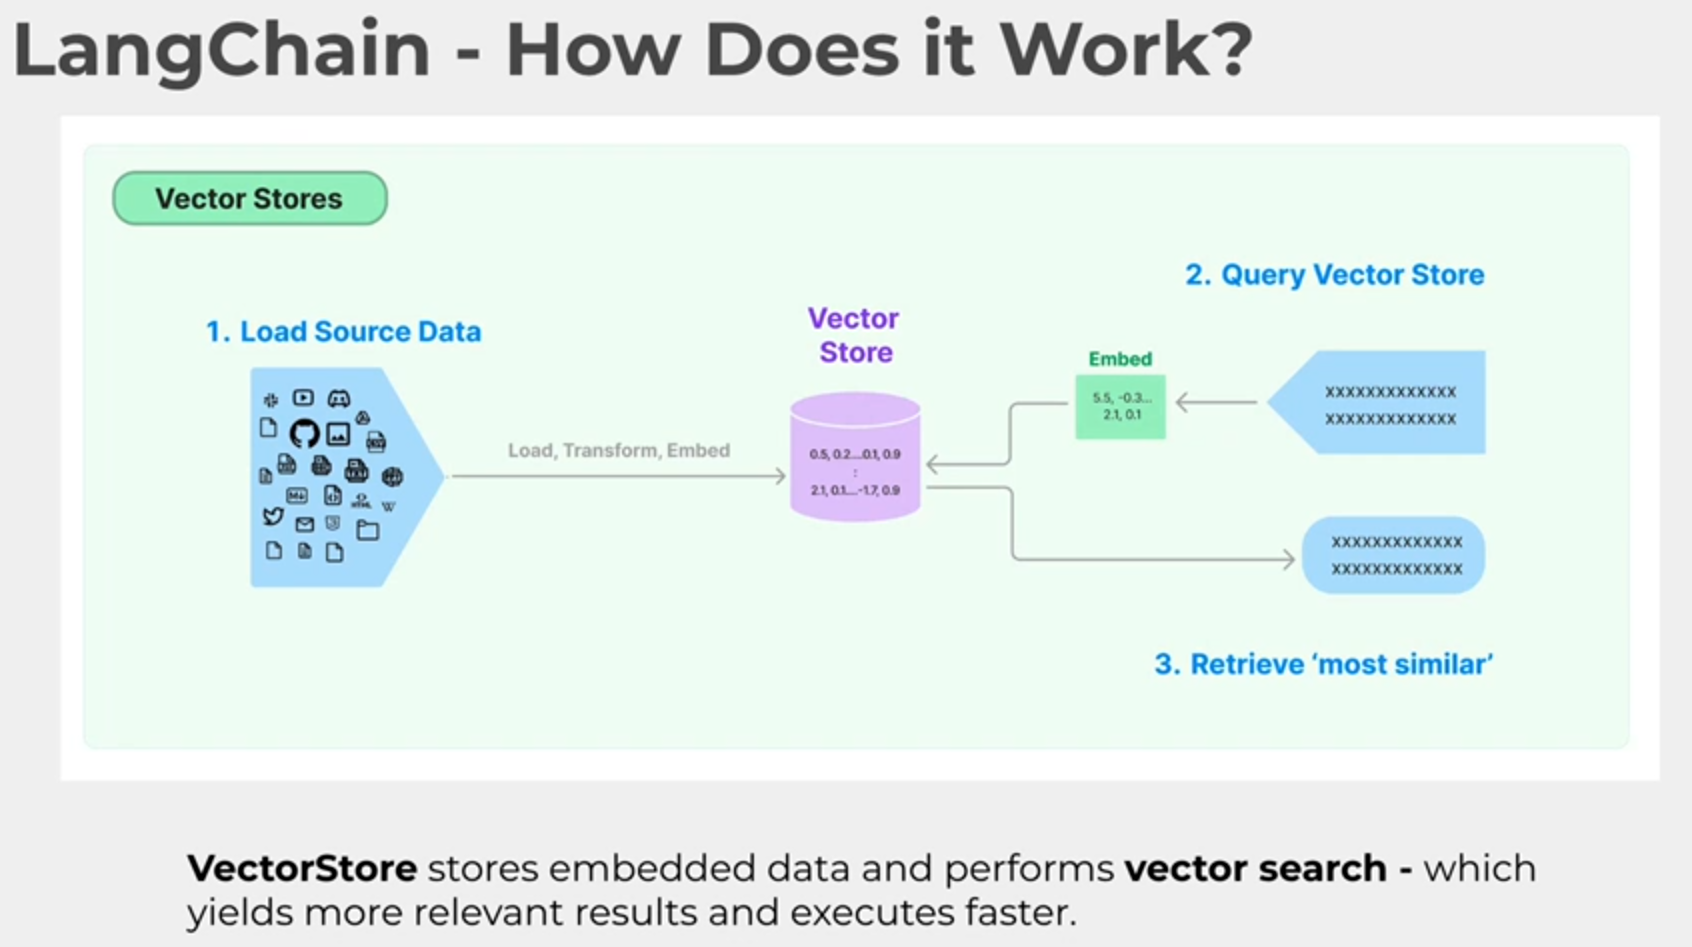
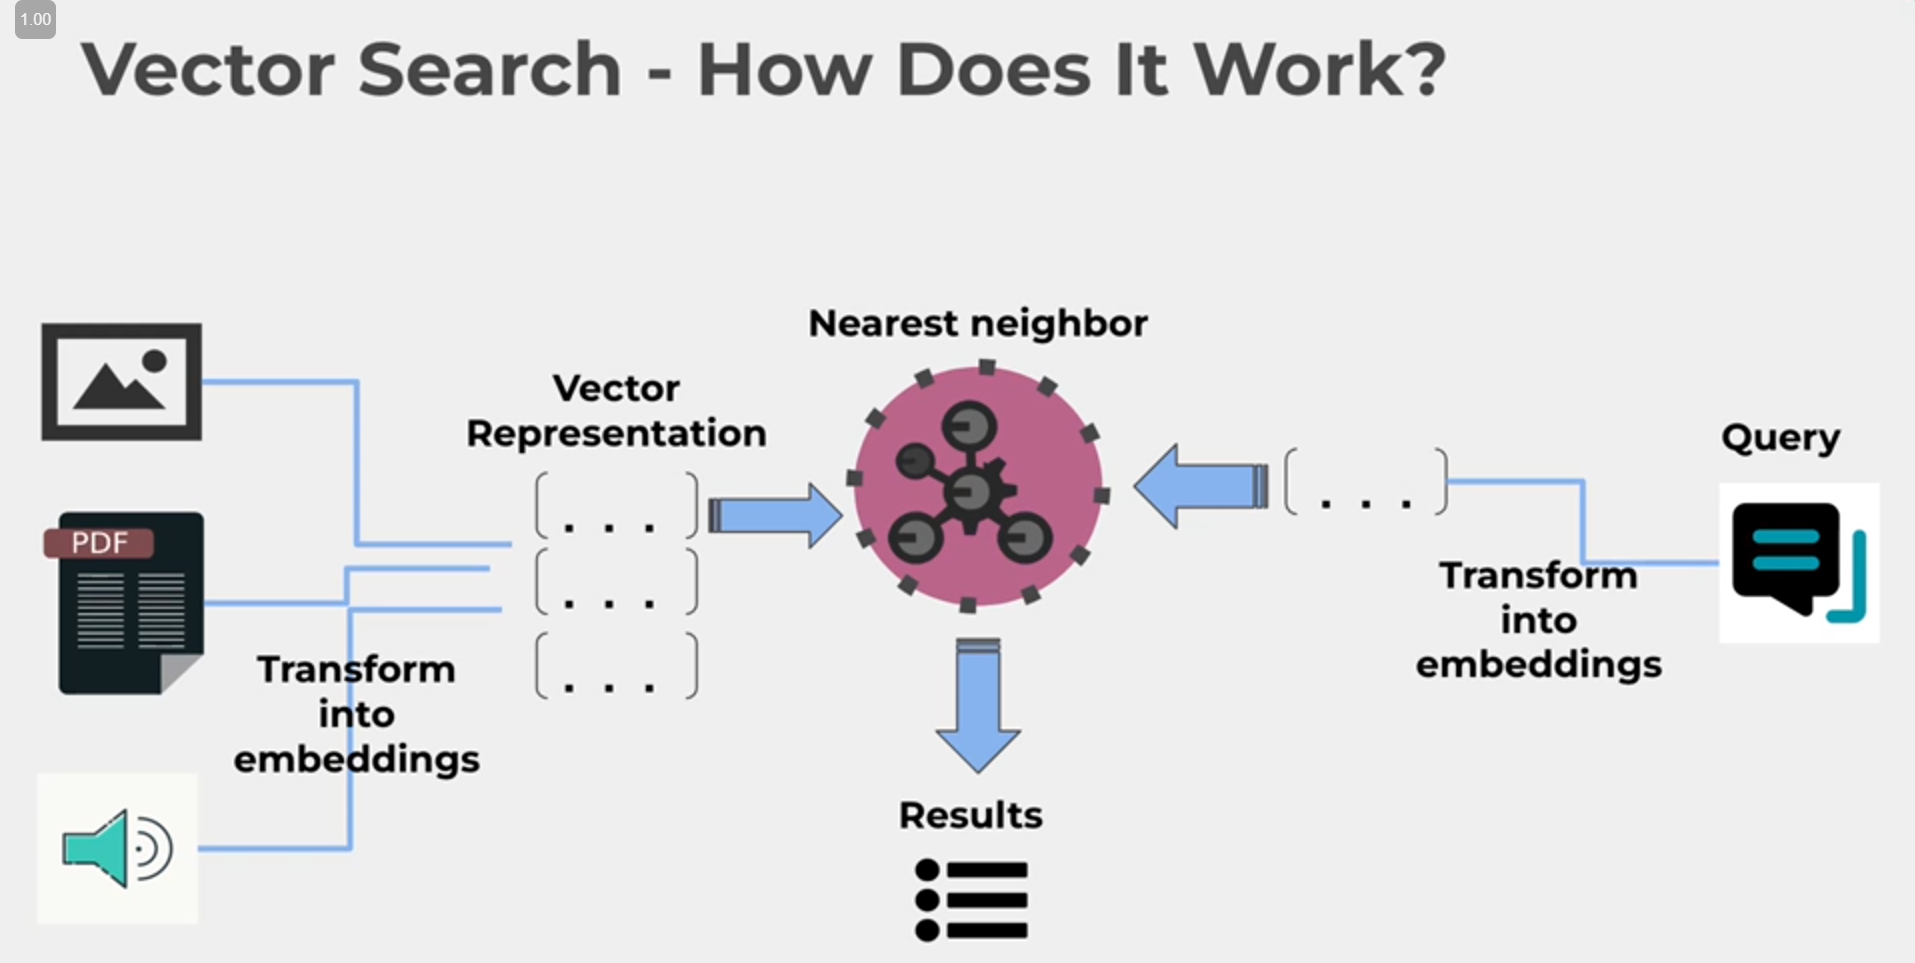

# LangChain: Memory
**Outline**

* ConversationBufferMemory
* ConversationBufferWindowMemory
* ConversationTokenBufferMemory
* ConversationSummaryMemory


In [3]:
!pip install -qU langchain-google-genai
!pip install python-dotenv

In [7]:
import os
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [9]:
from langchain_google_genai import ChatGoogleGenerativeAI

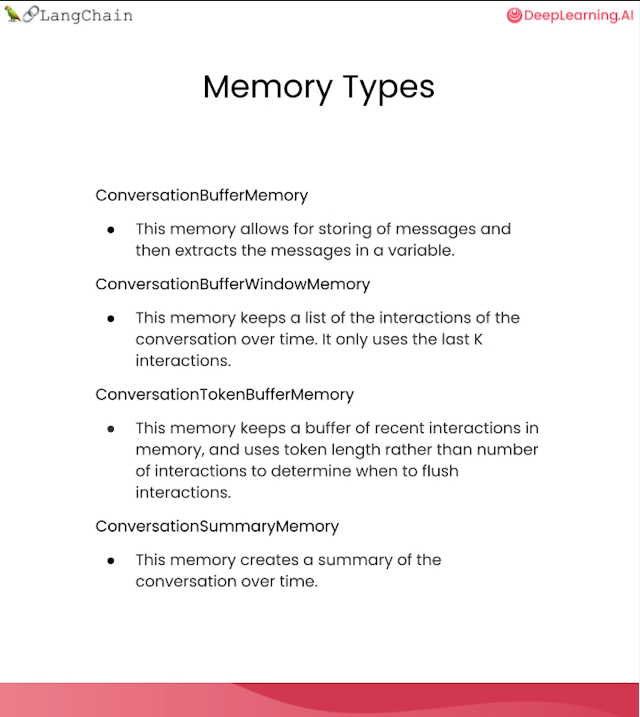

# ConversationBufferMemory

This memory allows for storing of messages and then extracts the messages in a variable

### Imports

In [10]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

### Chat Model and Memory

In [17]:
llm_model = "gemini-1.5-flash"

In [18]:
llm = ChatGoogleGenerativeAI(temperature=0, model=llm_model, api_key=GOOGLE_API_KEY)
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm = llm,
    memory = memory,
    verbose = True
)

### Understanding How This type of Memory Works

Verbose to true value helps to understand the LLM processing logic

In [19]:
conversation.predict(input="Hi, my name is Lora")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Lora
AI:

> Finished chain.


'Hi Lora! It\'s nice to meet you.  My name isn\'t really a "name" in the human sense, as I don\'t have a personal identity like you do.  I\'m a large language model, trained by Google.  I don\'t have feelings or experiences, but I can access and process information from a massive dataset of text and code.  Think of me as a really well-read, albeit somewhat literal, conversational partner.  So, what can I help you with today?  Are you looking for information on a specific topic, or just wanting to chat?'

In [20]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Lora
AI: Hi Lora! It's nice to meet you.  My name isn't really a "name" in the human sense, as I don't have a personal identity like you do.  I'm a large language model, trained by Google.  I don't have feelings or experiences, but I can access and process information from a massive dataset of text and code.  Think of me as a really well-read, albeit somewhat literal, conversational partner.  So, what can I help you with today?  Are you looking for information on a specific topic, or just wanting to chat?
Human: What is 1+1?
AI:

> Finished chain.


"1 + 1 = 2.  That's a pretty straightforward calculation!  My training data includes a vast amount of mathematical information, so simple arithmetic problems like this are easily within my capabilities.  Is there anything else I can help you with? Perhaps a more complex equation, or a completely different topic altogether? I'm happy to discuss pretty much anything, within the boundaries of my programming, of course."

In [21]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Lora
AI: Hi Lora! It's nice to meet you.  My name isn't really a "name" in the human sense, as I don't have a personal identity like you do.  I'm a large language model, trained by Google.  I don't have feelings or experiences, but I can access and process information from a massive dataset of text and code.  Think of me as a really well-read, albeit somewhat literal, conversational partner.  So, what can I help you with today?  Are you looking for information on a specific topic, or just wanting to chat?
Human: What is 1+1?
AI: 1 + 1 = 2.  That's a pretty straightforward calculation!  My training data includes a vast amount of mathematical inform

"Your name is Lora.  You told me that at the beginning of our conversation.  I have a good memory for details within our current interaction, although I don't retain information from previous conversations.  Is there anything else I can assist you with?"

### Memory of Chat retained

In [22]:
print(memory.buffer)

Human: Hi, my name is Lora
AI: Hi Lora! It's nice to meet you.  My name isn't really a "name" in the human sense, as I don't have a personal identity like you do.  I'm a large language model, trained by Google.  I don't have feelings or experiences, but I can access and process information from a massive dataset of text and code.  Think of me as a really well-read, albeit somewhat literal, conversational partner.  So, what can I help you with today?  Are you looking for information on a specific topic, or just wanting to chat?
Human: What is 1+1?
AI: 1 + 1 = 2.  That's a pretty straightforward calculation!  My training data includes a vast amount of mathematical information, so simple arithmetic problems like this are easily within my capabilities.  Is there anything else I can help you with? Perhaps a more complex equation, or a completely different topic altogether? I'm happy to discuss pretty much anything, within the boundaries of my programming, of course.
Human: What is my name?


In [23]:
memory.load_memory_variables({})

{'history': 'Human: Hi, my name is Lora\nAI: Hi Lora! It\'s nice to meet you.  My name isn\'t really a "name" in the human sense, as I don\'t have a personal identity like you do.  I\'m a large language model, trained by Google.  I don\'t have feelings or experiences, but I can access and process information from a massive dataset of text and code.  Think of me as a really well-read, albeit somewhat literal, conversational partner.  So, what can I help you with today?  Are you looking for information on a specific topic, or just wanting to chat?\nHuman: What is 1+1?\nAI: 1 + 1 = 2.  That\'s a pretty straightforward calculation!  My training data includes a vast amount of mathematical information, so simple arithmetic problems like this are easily within my capabilities.  Is there anything else I can help you with? Perhaps a more complex equation, or a completely different topic altogether? I\'m happy to discuss pretty much anything, within the boundaries of my programming, of course.\n

In [24]:
memory = ConversationBufferMemory()

In [25]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})

In [26]:
print(memory.buffer)

Human: Hi
AI: What's up


In [27]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [28]:
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})

In [29]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool"}

# ConversationBufferWindowMemory

This memory keeps a list of the interactions of the conversation over time. It only uses the last K interactions.

In [30]:
from langchain.memory import ConversationBufferWindowMemory

In [35]:
llm = ChatGoogleGenerativeAI(temperature=0, model=llm_model,api_key=GOOGLE_API_KEY)

In [32]:
memory = ConversationBufferWindowMemory(k=1)

<ipython-input-32-edd6ddba5fe5>:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferWindowMemory(k=1)


In [36]:
conversation = ConversationChain(
    llm = llm,
    memory = memory,
    verbose = False
)

In [37]:
conversation.predict(input="Hi, my name is Aliza")

'Hi Aliza! It\'s nice to meet you.  My name isn\'t really a "name" in the human sense, as I don\'t have a personal identity like you do.  I\'m a large language model, trained by Google.  I don\'t have feelings or experiences, but I can access and process information from a massive dataset of text and code.  So, while I can\'t tell you about my weekend or what my favorite color is, I can tell you about the history of the color blue, or the latest research on artificial intelligence, or even help you write a poem!  What would you like to talk about today?'

In [38]:
conversation.predict(input="What is 1+1?")

"1 + 1 = 2.  That's a fundamental arithmetic operation.  It's based on the Peano axioms, which define the natural numbers and their successor function.  In essence, the successor of 1 is 2.  This is a very basic concept, taught in early elementary school mathematics around the world.  It's the foundation for much more complex mathematical concepts and calculations.  Is there anything else I can help you with?"

In [39]:
conversation.predict(input="What is my name?")

'I do not know your name.  I have no access to personal information about you unless you have explicitly provided it during our current conversation.  My knowledge is based on the vast dataset I was trained on, but that dataset does not include private details about individuals.  To help me answer your questions more effectively in the future, please feel free to share information with me, but remember that I will not retain that information after our conversation ends unless you explicitly instruct me to do so (and even then, my ability to do so is limited by my design and security protocols).'

# ConversationTokenBufferMemory

This memory keeps a buffer of recent interactions in memory, and uses token length rather than number of interactions to determine when to flush interactions.

In [40]:
from langchain.memory import ConversationTokenBufferMemory

In [41]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=30)

<ipython-input-41-a5f6e96642c3>:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=30)


In [42]:
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"},
                    {"output": "Charming!"})

In [43]:
memory.load_memory_variables({})

{'history': 'AI: Amazing!\nHuman: Backpropagation is what?\nAI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

# ConversationSummaryBufferMemory

This memory creates a summary of the conversation over time

In [44]:
from langchain.memory import ConversationSummaryBufferMemory

In [45]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."


In [46]:
memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)

<ipython-input-46-84069f0aca94>:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)


In [47]:
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"},
                    {"output": f"{schedule}"})

In [48]:
memory.load_memory_variables({})

{'history': 'System: The human greets the AI, and after some casual exchange, asks what is on the schedule for the day.\nAI: There is a meeting at 8am with your product team. You will need your powerpoint presentation prepared. 9am-12pm have time to work on your LangChain project which will go quickly because Langchain is such a powerful tool. At Noon, lunch at the italian resturant with a customer who is driving from over an hour away to meet you to understand the latest in AI. Be sure to bring your laptop to show the latest LLM demo.'}

In [49]:
conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True
)

In [50]:
from langchain.prompts import ChatPromptTemplate

In [51]:
demo = """
Generate a demo to show to the customer\
the output should be in numbered points and must in the following format\
1. Idea
2. Application
3. Conclusion
{text}
"""

In [52]:
prompt_template = ChatPromptTemplate.from_template(demo)

In [53]:
demo_suggestion = "What would be a good demo to show for a langchain AI Agent in concise way?"

In [54]:
message = prompt_template.format_messages(text=demo_suggestion)

In [55]:
response = llm(message)

<ipython-input-55-54fecca17caa>:1: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm(message)


In [56]:
print(response.content)

Here's a demo showcasing a LangChain AI agent, broken down into the numbered points you requested:

**1. Idea:**  Building a personalized travel itinerary based on user preferences.

**Application:** (This section would involve a live demonstration, but here's a script outlining what would happen)

* **The Agent's Capabilities:**  We'll use a LangChain agent that combines several tools:
    * **A Large Language Model (LLM):**  For natural language understanding and itinerary generation.
    * **A Web Search Tool:** To gather information about locations, attractions, and transportation.
    * **A Calendar API (optional, for more advanced demos):** To check for availability of flights and hotels.

* **The User Interaction:**  I'll ask the agent to create a 5-day trip to Italy for a couple interested in history, art, and good food, with a budget of $3000.  (The specific prompt would be shown on screen).

* **The Agent's Response:** The agent will then:
    * Use the LLM to understand the 

## Used Output Parser for practice purpose

In [ ]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema

In [ ]:
idea_schema = ResponseSchema(name="1.",
                             description="It should put forth the main idea to build the AI agent")
application_schema = ResponseSchema(name="2.",
                             description="It should suggest why to build it for this use case")
conclusion_schema = ResponseSchema(name="3.",
                             description="It should conclude with one line")

In [ ]:
response_schemas = [idea_schema, application_schema, conclusion_schema]

In [ ]:
schema = StructuredOutputParser.from_response_schemas(response_schemas=response_schemas)

In [ ]:
format_instructions = schema.get_format_instructions()

In [ ]:
demo = """
Generate a demo to show to the customer\
the output should be in numbered points and must in the following format\
1. Idea
2. Application
3. Conclusion
{text}
{format_instructions}
"""

In [ ]:
prompt_template = ChatPromptTemplate.from_template(demo)

In [ ]:
demo_suggestion = "What would be a good demo to show for a langchain AI Agent in concise way?"

In [ ]:
message = prompt_template.format_messages(text=demo_suggestion, format_instructions=format_instructions)

In [ ]:
response = llm(message)
print(response.content)

```json
{
	"1.": "Build a LangChain AI agent that can answer questions about your company's internal documentation (e.g., onboarding materials, product specs, engineering design documents).  The agent will ingest the documents, create an index, and then use a Large Language Model (LLM) to query the index and provide relevant, concise answers.",
	"2.": "This agent addresses the common problem of employees struggling to find information quickly within large amounts of internal documentation.  It provides a natural language interface for querying, making information access faster and more efficient, boosting productivity and reducing onboarding time.",
	"3.": "A LangChain AI agent empowers employees with quick and easy access to critical internal knowledge."
}
```


In [ ]:
output_dict = schema.parse(response.content)

In [ ]:
output_dict.get("3.")

'A LangChain AI agent empowers employees with quick and easy access to critical internal knowledge.'

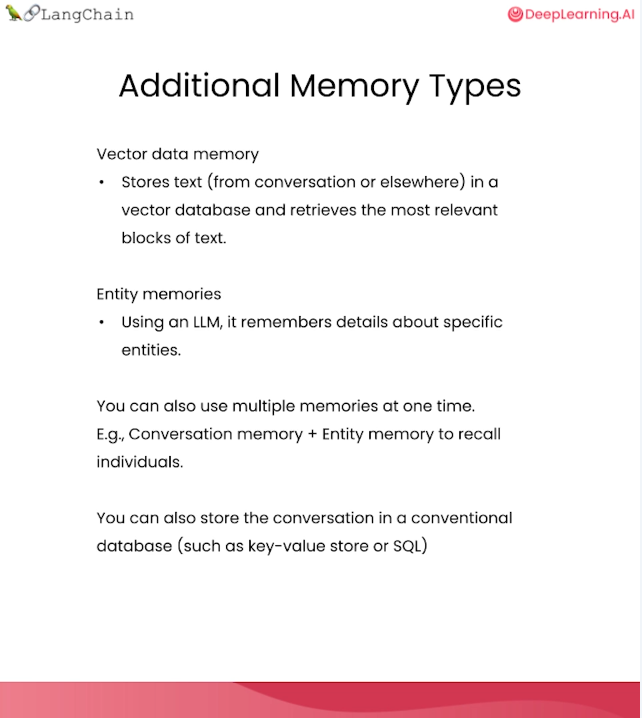

# Additional Memory Types

Vector data memory
* stores text (from conversation or elsewhere) in  a vector database and retrieves the most relevant blocks of text.

Entity memories
* Using a LLM, it remembers details about specific entities.

You can also use multiple memories at one time.
E.g. Conversation memory + Entity memory to recall individuals.

You can also store the conversation in a conventional database (such as key-value store or SQL)